In [53]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from prettytable import PrettyTable
import requests
from bs4 import BeautifulSoup
import datetime
import calendar

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install "notebook>=5.3" "ipywidgets>=7.5"

## Dataser Homicidios

# Lectura
leemos el archivo xlsx y lo covertimos en dataframe

In [4]:
path_homicidios = 'C:/Users/Raul Penayo/Desktop/p2ori/homicidios.xlsx'

homicidios_xls = pd.ExcelFile(path_homicidios)

In [5]:
homicidios_xls

Vemos que listas estan disponibles

In [6]:
sheet_names_homicidios = homicidios_xls.sheet_names


In [7]:
sheet_names_homicidios

['HECHOS', 'VICTIMAS']

Procedemos a iterar en los datos del archivo *xls* através de los nombres de las hojas. Para luego poder extrar los datos de las hojas que nostros querramos.

In [8]:
excel_data = {}
for sheet_name in sheet_names_homicidios:
    excel_data[sheet_name] = pd.read_excel(homicidios_xls, sheet_name)

Guardamos en una nueva variable el DataFrame de HECHOS y de VICTIMAS

In [9]:
homicidios_hechos = excel_data['HECHOS']

homicidios_victimas = excel_data['VICTIMAS']

### DataFrame *HECHOS*

#### Información 

In [10]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [11]:
homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Vemos que hay 21 columnas y 696 registro en el DataFrame de HECHOS. Pero notamos que hay registros vacios en algunas columnas, además, hay algunos nombres de columnas que no logra dar a entender la informacion que brinda, asi que podriamos normalizarlo obteniendo informacion del *DICCIONARIO DE HECHOS*.

#### Normalización de columnas

- Cambiamos todas las columnas para que solo la primera letra esté en mayúscula.

In [12]:
homicidios_hechos.columns = [x.capitalize() for x in homicidios_hechos.columns]

In [13]:
homicidios_hechos.columns

Index(['Id', 'N_victimas', 'Fecha', 'Aaaa', 'Mm', 'Dd', 'Hora', 'Hh',
       'Lugar_del_hecho', 'Tipo_de_calle', 'Calle', 'Altura', 'Cruce',
       'Dirección normalizada', 'Comuna', 'Xy (caba)', 'Pos x', 'Pos y',
       'Participantes', 'Victima', 'Acusado'],
      dtype='object')

- Modificamos el nombre de algunas columnas para mayor entendimiento. <p>
    1. Primero veamos el *DICCIONARIO DE HECHOS*.

In [18]:
# Ruta al archivo Excel
ruta_al_archivo = 'Diccionario de datos Siniestros viales.xlsx'

# Leer el archivo Excel
data = pd.read_excel(ruta_al_archivo)

# Mostrar las primeras filas del DataFrame para verificar que se ha leído correctamente
print(data.head())


  variables y definiciones                        descripción Unnamed: 2
0                       ID  identificador unico del siniestro        NaN
1               N_VICTIMAS               cantidad de víctimas        NaN
2                    FECHA        fecha en formato dd/mm/aaaa        NaN
3                     AAAA                                año        NaN
4                       MM                                mes        NaN


2. Ahora modificamos las siguientes columnas:<p>
    * ID: Id Hecho.
    * N victimas: Nro de víctimas.
    * Aaaa: Año.
    * Mm: Mes.
    * Dd: Día.
    * Hh: Hora entera.
    * Xy (caba): XY (CABA).
    * Pos x: POS X.
    * Pos y: POS Y.
    * Victima: Víctima.

In [19]:
new_name = {'Id':'Id Hecho',
            'N_victimas':'Nro de víctimas',
            'Aaaa':'Año',
            'Mm':'Mes',
            'Dd':'Día',
            'Hh':'Hora entera',
            'Lugar_del_hecho': 'Lugar del hecho',
            'Tipo_de_calle': 'Tipo de calle',
            'Xy (caba)':'XY (CABA)',
            'Pos x':'POS X',
            'Pos y':'POS Y',
            'Victima': 'Víctima'}

homicidios_hechos.rename(columns=new_name, inplace=True)

In [20]:
homicidios_hechos.head(2)

,Id Hecho,Nro de víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,...,Altura,Cruce,Dirección normalizada,Comuna,XY (CABA),POS X,POS Y,Participantes,Víctima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [26]:
import Utilities as u


In [27]:
u.porcentaje_nulos(homicidios_hechos)

La columna Id Hecho tiene un 0.0% de valores nulos.
La columna Nro de víctimas tiene un 0.0% de valores nulos.
La columna Fecha tiene un 0.0% de valores nulos.
La columna Año tiene un 0.0% de valores nulos.
La columna Mes tiene un 0.0% de valores nulos.
La columna Día tiene un 0.0% de valores nulos.
La columna Hora tiene un 0.0% de valores nulos.
La columna Hora entera tiene un 0.0% de valores nulos.
La columna Lugar del hecho tiene un 0.0% de valores nulos.
La columna Tipo de calle tiene un 0.0% de valores nulos.
La columna Calle tiene un 0.1% de valores nulos.
La columna Altura tiene un 81.5% de valores nulos.
La columna Cruce tiene un 24.6% de valores nulos.
La columna Dirección normalizada tiene un 1.1% de valores nulos.
La columna Comuna tiene un 0.0% de valores nulos.
La columna XY (CABA) tiene un 0.0% de valores nulos.
La columna POS X tiene un 0.0% de valores nulos.
La columna POS Y tiene un 0.0% de valores nulos.
La columna Participantes tiene un 0.0% de valores nulos.
La colu

Vemos que hay datos nulos en la columnas *Calle*, *Altura*, *Cruce* y *Dirección Normalizada*. Pero el que llama mas la atención es el porcentaje de la columna *Altura* ya que es mas del 80% de datos nulos. Esto puede deberse a que la ocurrencia de los siniestros no fue especificamente en una calle y altura específica, sino, en esquinas. <br>
Corroboremos..

In [28]:
homicidios_hechos[homicidios_hechos['Altura'].isna()]['Lugar del hecho'].head(10)

0             AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ
1                     AV GRAL PAZ  Y AV DE LOS CORRALES
3                 AV LARRAZABAL Y GRAL VILLEGAS CONRADO
4             AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA 
5                        AV 27 DE FEBRERO Y AV ESCALADA
6                          NOGOYA Y JOAQUIN V. GONZALES
7                   AV GENERAL PAZ Y AV DE LOS CORRALES
8                    AV BELGRANO Y BERNARDO DE IRIGOYEN
10                           AV SCALABRINI ORTIZ Y VERA
11    AV REGIMIENTO DE PATRICIOS Y QUINQUELA MARTIN ...
Name: Lugar del hecho, dtype: object

Vemos que efectivamente los siniestros que ocurrieron en esquinas, no contiene información de altura. Asi que procedemos a eliminar esta columna.

In [29]:
homicidios_hechos.drop(columns= 'Altura',inplace= True)

#### columa *cruce*

Bien ahora veamos los datos nulos en la columna *Cruce*.

In [30]:
homicidios_hechos['Cruce'].isna().sum()

171

Vemos que tenemos 171 registros nulos. Y podriamos especular que esos registros nulos es por el echo de que los siniestros ocurrieron en direcciones exactas y no en esquinas. <br>
Corroboremos..

In [31]:
homicidios_hechos[homicidios_hechos['Cruce'].isna()][['Lugar del hecho','POS Y', 'POS X','Cruce']] 

,Lugar del hecho,POS Y,POS X,Cruce
2,AV ENTRE RIOS 2034,-34.63189362,-58.39040293,NaN
9,AV ENTRE RIOS 1366,-34.62477387,-58.39114932,NaN
14,SUIPACHA 156,-34.60653282,-58.37952223,NaN
33,LIMA 1483,-34.62571878,-58.38247061,NaN
35,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,-34.63657525428238,-58.37714647568196,NaN
...,...,...,...,...
680,AU 25 DE MAYO KM7 (ALTURA PASCO),-34.62453459,-58.39591856,NaN
685,ESMERALDA 1359,-34.59167894,-58.37795815,NaN
687,AV. GAONA 3655,-34.62140594,-58.47633683,NaN
694,AV. EVA PERON 4071,-34.65021673,-58.47066794,NaN


Vemos que donde hay direcciones con altura específica, no tenemos datos de cruce, lo cual es obvio por la no existencia del mismo. Pero busquemos exhaustivamente donde el *Lugar del hecho* contenga una **'y'** como separador de calles.

In [32]:
homicidios_hechos[homicidios_hechos['Lugar del hecho'].str.contains(r'\by\b', case=False) & homicidios_hechos['Cruce'].isna()][['Lugar del hecho','POS Y', 'POS X','Cruce']] 

,Lugar del hecho,POS Y,POS X,Cruce
64,AUTOPISTA 1 SUR PTE ARTURO FRONDIZI Y AV CASEROS,-34.62907067,-58.37864583,NaN
100,AUTOPISTA 9 DE JULIO SUR Y AV BRASIL,-34.62764717,-58.37910942,NaN
148,AU 25 DE MAYO Y AV. BOEDO,-34.62743346,-58.41595919,NaN
174,CAMINO CIUDAD UNUVERSITARIA Y AV. TTE. GUIRALDES,-34.54560369,-58.43834197,NaN
180,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,.,.,NaN
234,AU 25 DE MAYO Y AV. VARELA,-34.63997430,-58.45807401,NaN
385,AU Perito Moreno y Av. Eva Perón SENTIDO CENTRO,-34.64949724,-58.46958442,NaN
398,AU Perito Moreno y Reservistas Argentinos,-34.63682499,-58.52144411,NaN
555,"AU 25 DE MAYO ALTURA PUMACAHUA Y RECUERO, CASI...",-34.63638927,-58.45068621,NaN
643,AU FRONDIZI Y SUAREZ AV.,-34.64035082,-58.37709334,NaN


Bien, confirmamos que los registros nulos en la columna *Cruce* se debe a que el siniestro se produjo en un punto específico de una calle. <p>
Como el porcentaje de registros nulos no es tan alto, no eliminaremos la columna, pero si procederemos a cambiar los valores nulos por un *'--'*.

In [33]:
homicidios_hechos['Cruce'].fillna('--', inplace= True)

##### Columna *Dirección normalizada*

Ahora analicemos los registros nulos de la columna *Dirección normalizada*

In [34]:
homicidios_hechos['Dirección normalizada'].isna().sum()

8

Podemos obtener los datos para la columna *Dirección normalizada* segun la **Latitud (POS Y)** y la **Longitud (POS X)**, veamos si tenemos esos datos.

In [35]:
homicidios_hechos[homicidios_hechos['Dirección normalizada'].isna()][['Dirección normalizada','POS Y', 'POS X','Tipo de calle']] 

,Dirección normalizada,POS Y,POS X,Tipo de calle
38,NaN,.,.,AUTOPISTA
106,NaN,.,.,AUTOPISTA
119,NaN,.,.,CALLE
180,NaN,.,.,AUTOPISTA
181,NaN,.,.,AUTOPISTA
313,NaN,.,.,AUTOPISTA
546,NaN,.,.,AUTOPISTA
621,NaN,.,.,AUTOPISTA


Vemos que no contamos con los datos de **Longitud** y **Latitud**. Asi que procedemos a cambiar los valores NaN por un '--', ya que no es conveniente eliminar esos registros.

In [36]:
homicidios_hechos['Dirección normalizada'].fillna('--', inplace= True)

##### Columna *Calle*

In [37]:
homicidios_hechos[homicidios_hechos['Calle'].isna()]

,Id Hecho,Nro de víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),POS X,POS Y,Participantes,Víctima,Acusado
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,--,--,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Vemos que solo hay un única fila con dato nulo en la columna *Calle*. Y notamos que no nos brinda mucha informacion del siniestro. Asi que decidimos eliminar dicha fila.

In [38]:
homicidios_hechos.dropna(subset='Calle', inplace= True)

##### registros duplicados

In [39]:
u.filas_duplicadas(homicidios_hechos)

'El DataFrame no tiene filas duplicadas'

#### tipo de datos

In [40]:
u.tipos_de_datos_unico(homicidios_hechos)

+-----------------------+---------------------------------------------------------------------+
|         Campo         |                            Tipo de datos                            |
+-----------------------+---------------------------------------------------------------------+
|        Id Hecho       |                            <class 'str'>                            |
|    Nro de víctimas    |                            <class 'int'>                            |
|         Fecha         |          <class 'pandas._libs.tslibs.timestamps.Timestamp'>         |
|          Año          |                            <class 'int'>                            |
|          Mes          |                            <class 'int'>                            |
|          Día          |                            <class 'int'>                            |
|          Hora         | <class 'datetime.time'>, <class 'str'>, <class 'datetime.datetime'> |
|      Hora entera      |               

Notamos que la columnas *Hora* y *Hora entera* tienen mas de un tipo de datos en sus registros. Veamos cuantos registros tiene por cada tipo de dato.

In [41]:
u.count_data_by_type(homicidios_hechos,'Hora',str)

"En la columna Hora del DataFrame hay 85 de registros del tipo <class 'str'>"

In [46]:
u.count_data_by_type(homicidios_hechos,'Hora',datetime.time)

"En la columna Hora del DataFrame hay 607 de registros del tipo <class 'datetime.time'>"

In [47]:
u.count_data_by_type(homicidios_hechos,'Hora',datetime.datetime)

"En la columna Hora del DataFrame hay 3 de registros del tipo <class 'datetime.datetime'>"

Vemos que hay mas registros con tipo de dato *'datetime.time'*. Asi que modificaremos los demas a este tipo de datos para normalizar el DataFrame.

In [48]:
homicidios_hechos['Hora'] = homicidios_hechos['Hora'].apply(lambda x: u.convert_to_time(x))

In [49]:
u.tipos_de_datos_unico(homicidios_hechos)

+-----------------------+----------------------------------------------------+
|         Campo         |                   Tipo de datos                    |
+-----------------------+----------------------------------------------------+
|        Id Hecho       |                   <class 'str'>                    |
|    Nro de víctimas    |                   <class 'int'>                    |
|         Fecha         | <class 'pandas._libs.tslibs.timestamps.Timestamp'> |
|          Año          |                   <class 'int'>                    |
|          Mes          |                   <class 'int'>                    |
|          Día          |                   <class 'int'>                    |
|          Hora         |       <class 'datetime.time'>, <class 'str'>       |
|      Hora entera      |            <class 'int'>, <class 'str'>            |
|    Lugar del hecho    |                   <class 'str'>                    |
|     Tipo de calle     |                   <class '

Ahora procedamos a ver los registros de la columna ***Hora entera***.

In [50]:
homicidios_hechos.loc[homicidios_hechos['Hora entera'].apply(lambda x: isinstance(x, str))].shape[0]

1

In [51]:
homicidios_hechos.loc[homicidios_hechos['Hora entera'].apply(lambda x: isinstance(x, str))]

,Id Hecho,Nro de víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),POS X,POS Y,Participantes,Víctima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Vemos que el registros con el tipo de dato *'str'* en la columna ***Hora entera*** se debe a que no hay datos del mismo y se definidio como **SD** que significa: Sin Dato.<bn>
Asi que no modificamos nada.

Ahora vamos a cambiar los valores numericos de la columna ***Mes*** para cuando hagamos la visualización. <p>
Asi que procedemos primero a mapear números de mes a nombres de mes usando el módulo calendar.

In [54]:
nombre_meses = {i: calendar.month_name[i] for i in range(1, 13)}

Y ahora reemplazamos los valores de la columna del DataFrame.

In [55]:
homicidios_hechos['Mes'] = homicidios_hechos['Mes'].replace(nombre_meses)

In [56]:
homicidios_hechos.head()

,Id Hecho,Nro de víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),POS X,POS Y,Participantes,Víctima,Acusado
0,2016-0001,1,2016-01-01,2016,January,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,January,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,January,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,--,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,January,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,January,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Vemos que los nombres de los meses estan en inglés, asi que lo modificamos a español

In [57]:
meses_esp = {'January': 'Enero',
            'February': 'Febrero', 
            'March': 'Marzo', 
            'April': 'Abril', 
            'May': 'Mayo', 
            'June': 'Junio', 
            'July': 'Julio',
            'August': 'Agosto', 
            'September': 'Septiembre', 
            'October': 'Octubre', 
            'November': 'Noviembre', 
            'December': 'Diciembre'}

homicidios_hechos['Mes'] = homicidios_hechos['Mes'].replace(meses_esp)

##### Registros ***SD*** (Sin Dato)

En el análisis del DataFrame, notamos que hay registros con valores *'SD'*, veamos el porcentaje que representan esos registros en el DataFrame.

In [58]:
u.calculate_percentage_of_sd(homicidios_hechos)

+-----------------------+--------------------+
|        Columna        | Porcentaje de 'SD' |
+-----------------------+--------------------+
|        Id Hecho       |       0.00%        |
|    Nro de víctimas    |       0.00%        |
|         Fecha         |       0.00%        |
|          Año          |       0.00%        |
|          Mes          |       0.00%        |
|          Día          |       0.00%        |
|          Hora         |       0.14%        |
|      Hora entera      |       0.14%        |
|    Lugar del hecho    |       0.00%        |
|     Tipo de calle     |       0.00%        |
|         Calle         |       0.00%        |
|         Cruce         |       0.00%        |
| Dirección normalizada |       0.00%        |
|         Comuna        |       0.00%        |
|       XY (CABA)       |       0.00%        |
|         POS X         |       0.00%        |
|         POS Y         |       0.00%        |
|     Participantes     |       0.00%        |
|        Víct

#### Visualización de datos

Vamos a utilizar gráficos para poder comprender mejor los datos.
<p> Pero antes, haremos una copia del DataFrame por si necesitamos realizar algunos cambios para la visualización.

In [59]:
homicidios_hechos_ = homicidios_hechos.copy()

#####  Vista general geografico de los siniestros.

Graficaremos un mapa con los puntos donde ocurrieron siniestros con homicidios.

In [60]:
homicidios_hechos_['POS Y'] = pd.to_numeric(homicidios_hechos_['POS Y'], errors='coerce')
homicidios_hechos_['POS X'] = pd.to_numeric(homicidios_hechos_['POS X'], errors='coerce')

In [61]:
plt.style.use('fivethirtyeight')

fig = px.scatter_mapbox(
    homicidios_hechos_,
    lat = 'POS Y',
    lon = 'POS X',
    zoom = 10.8,
    width = 800,   
    height = 680,  
    hover_data = ['Nro de víctimas'],
)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(title_x=0.5,
                  title_y=0.95, 
                  title_text='Distribucion de los siniestros',
                  title_font=dict(size=24))

fig.show()

#####  Número de víctimas a lo largo del tiempo

Sabemos que los datos que tenemos de los siniestros oscilan entre el año 2016 y 2021. Asi que veremos la cantidad de víctimas por año.

Text(0.5, 1.0, 'Número de víctimas a lo largo del tiempo \n')

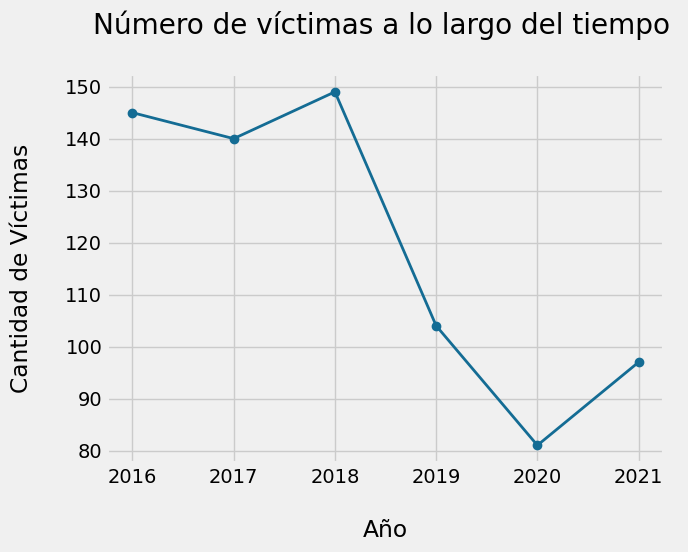

In [62]:
# plt.rcdefaults() Restaurar al estilo predeterminado

plt.style.use('fivethirtyeight')

homicidios_hechos_['Fecha'] = pd.to_datetime(homicidios_hechos_['Fecha'], format='%d/%m/%Y')
homicidios_hechos_.groupby(homicidios_hechos_['Fecha'].dt.year)['Nro de víctimas'].sum().plot(marker='o', linewidth= 2,color='#146C94')
plt.grid(visible=True)
plt.xlabel('\nAño')
plt.ylabel('Cantidad de Víctimas\n')
plt.title('Número de víctimas a lo largo del tiempo \n')

Podemos observar que hay un elevado numero de víctimas entre el año 2016 y 2018, y una tendencia baja luego de este tiempo, en los años 2019, 2020 y 2021. Probablemente se debe a las medidas preventivas durante la pandemia de COVID-19, ya que en esos años, se declaro una cuarentena estricta.

#####  Distribución de cantidad de víctimas por mes en cada año

Observaremos si hay algun patron en la cantidad de víctimas por mes y en cada año, y poder detectar algun fuente externo que provoque ese patron.

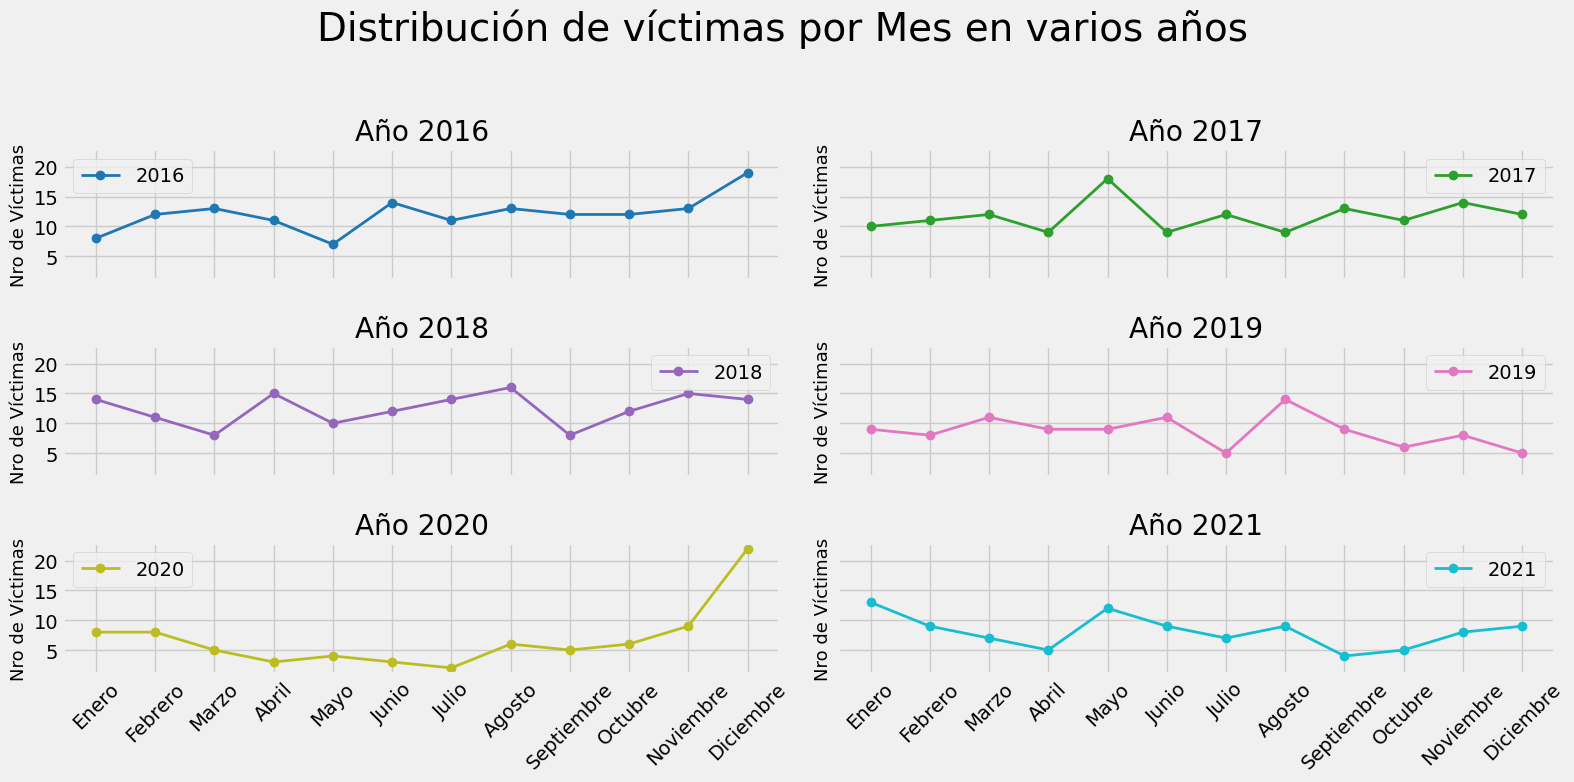

In [63]:
meses_ordenados = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
    'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

años = homicidios_hechos_['Año'].unique()

fig, axes = plt.subplots(3, 2, figsize=(16, 8), sharex=True, sharey=True)

colores = plt.cm.get_cmap('tab10', len(años)) # Paleta de colores

for i, year in enumerate(años):
    fila = i // 2
    columna = i % 2

    df_año = homicidios_hechos_[homicidios_hechos_['Año'] == year]

    df_mensual = df_año.groupby('Mes')['Nro de víctimas'].sum().reindex(meses_ordenados)
    
    ax = axes[fila, columna]
    color = colores(i)
    ax.plot(df_mensual.index, df_mensual.values, marker='o', label=str(year), linewidth= 2, color=color)
    ax.set_title('Año ' + str(year))
    ax.set_xlabel('')
    ax.set_ylabel('Nro de Víctimas', fontsize=13)
    ax.legend()
    

for ax in axes.flatten():
    ax.tick_params(axis='x', labelrotation=45)   
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
fig.suptitle('Distribución de víctimas por Mes en varios años \n', fontsize=28)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

Notamos que, como en el grafico anterior, una menor cantidad de víctimas entre el año 2019 y 2020, siendo mas específicos: desde *Noviembre del 2019* hasta *Noviembre del 2020*. Pero notamos un incremento elevado en el mes de Diciembre del año 2020. Esto puede deberse por los dias festivos y la flexibilidad de poder transitar por las calles desde ese entonces.

#####  Distribución de cantidad de víctimas por mes

Observaremos como se distribuyen la cantidad de victimas por mes.

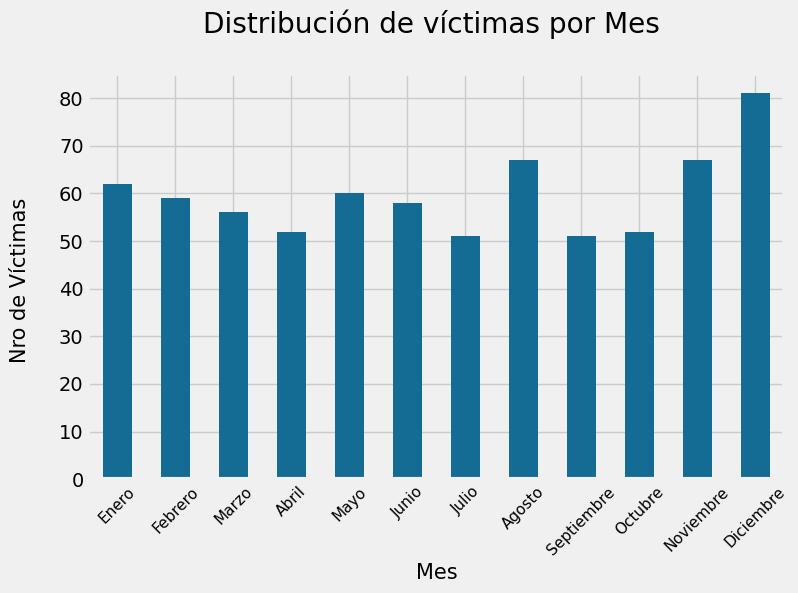

In [64]:
# Agrupar por mes y sumar la cantidad de víctimas
data_mensual = homicidios_hechos_.groupby('Mes')['Nro de víctimas'].sum().reindex(meses_ordenados)

plt.figure(figsize=(8, 5))
data_mensual.plot(kind='bar', color='#146C94')
plt.xlabel('Mes',fontsize=15)
plt.ylabel('Nro de Víctimas \n',fontsize=15)
plt.title('Distribución de víctimas por Mes \n')
plt.xticks(rotation=45, fontsize=11)  

plt.show()

Vemos que la información que nos brinda este gráfico concuerda con el anterior, ya que vemos que el mes de ***Diciembre*** tiene el mayor numero de victimas en siniestros viales. Esto se debe a lo anterior mencionado, ya que es costumbre en Argentina alrededor de las fechas festivas, la cantidad de ciudadanos consumiendo bebidas alcohólicas, que provoca mayor cantidad de siniestros. <p>

#####  Distribución de cantidad de víctimas por dias de la semana

Para poder hacer un gráfico que muestra la cantidad de víctimas por dias de la semana, tenemos que primero crear una columna que tenga valores del dia, segun la columna **Fecha**.

In [65]:
homicidios_hechos_['Día de la Semana'] = homicidios_hechos_['Fecha'].dt.dayofweek

Ahora mapeamos los números a nombres de los días que le corresponde.

In [66]:
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

homicidios_hechos_['Día de la Semana'] = homicidios_hechos_['Día de la Semana'].map(lambda x: dias_semana[x])

categorizamos los dias de la semana 

In [67]:
homicidios_hechos_['Día de la Semana'] = pd.Categorical(homicidios_hechos_['Día de la Semana'], categories=dias_semana, ordered=True)

creamos el grafico

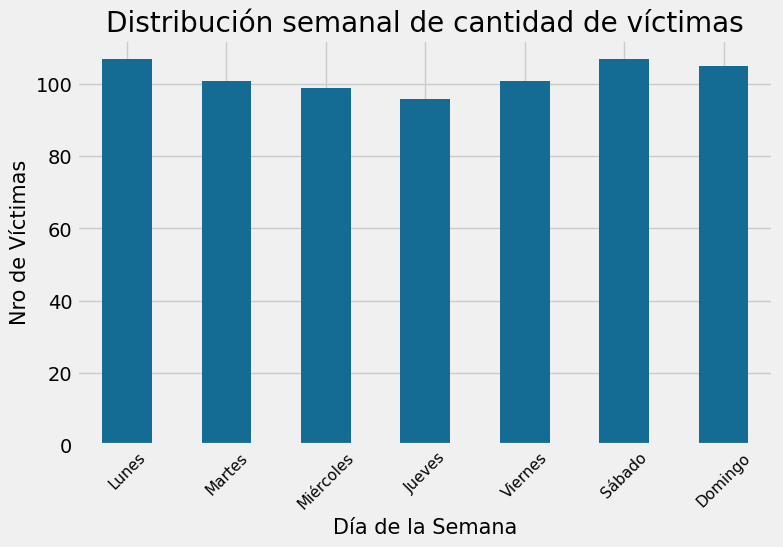

In [68]:
# Agrupamos por día de la semana y sumamos la cantidad de víctimas
data_semanal = homicidios_hechos_.groupby('Día de la Semana')['Nro de víctimas'].sum()

plt.figure(figsize=(8, 5))
data_semanal.plot(kind='bar', color='#146C94')
plt.xlabel('Día de la Semana',fontsize=15)
plt.ylabel('Nro de Víctimas',fontsize=15)
plt.title('Distribución semanal de cantidad de víctimas')
plt.xticks(rotation= 45,fontsize= 11)  

plt.show()

Notamos que los valores más altos en la cantidad de víctimas en los dias de la semana es en los ***Lunes*** y ***Sabados***, esto podria deberse por el inicio de la semana y el inicio del fín de semana, donde aumenta el tránsito.

#####  Distribución de siniestros por Día de semana y Fin de Semana

Vamos a observar la cantidad de siniestros que hay los **Días de semana**, que es de *Lunes* a *Viernes*, y los **Fines de semana** que es *Sabado* y *Domingo*.

Primero, debemos categorizar los dias de semana en: *Día de semana* o *Fin de semana*. Asi que procedemos a crear una función.

In [69]:
def categorizar_dia(dia_semana):
    if dia_semana in ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']:
        return 'Día de Semana'
    elif dia_semana in ['Sábado', 'Domingo']:
        return 'Fin de Semana'

aplicamos esta funcion a una nueva columna del data frame

In [70]:
homicidios_hechos_['Tipo de Día'] = homicidios_hechos_['Día de la Semana'].apply(categorizar_dia)

Procedemos hacer el grafico.

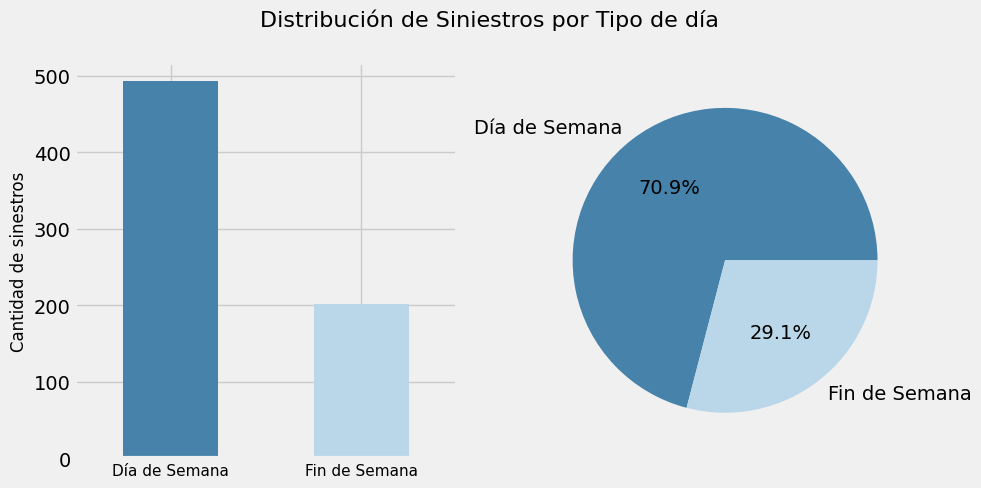

In [71]:
conteo_accidentes = homicidios_hechos_['Tipo de Día'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  
conteo_accidentes.plot(kind='bar', color=['#4682A9', '#BAD7E9'])
plt.xlabel('')
plt.ylabel('Cantidad de sinestros',fontsize= 12)
plt.xticks(rotation= 0,fontsize= 11) 

plt.subplot(1, 2, 2)  
conteo_accidentes.plot(kind='pie', autopct='%1.1f%%', colors=['#4682A9', '#BAD7E9'])
plt.ylabel('')

plt.suptitle('Distribución de Siniestros por Tipo de día', fontsize=16)

plt.tight_layout() 
plt.show()

notamos una gran cantidad de diferencia durante la semana y vemos que el fin de semana esto decrede, pero esto se debe a que los dias habiles son mas y los fines de semana menos

####  Distribución de siniestros por Hora del día

Observaremos la cantidad de siniestros que hay por hora del día, y veremos si hay alguna tendencia en estos datos.

Para poder hacer este gráfico, necesitamos convertir a número los valores de la columna *'Hora entera'* del DataFrame.

In [72]:
homicidios_hechos_['Hora entera'] = pd.to_numeric(homicidios_hechos_['Hora entera'], errors='coerce')

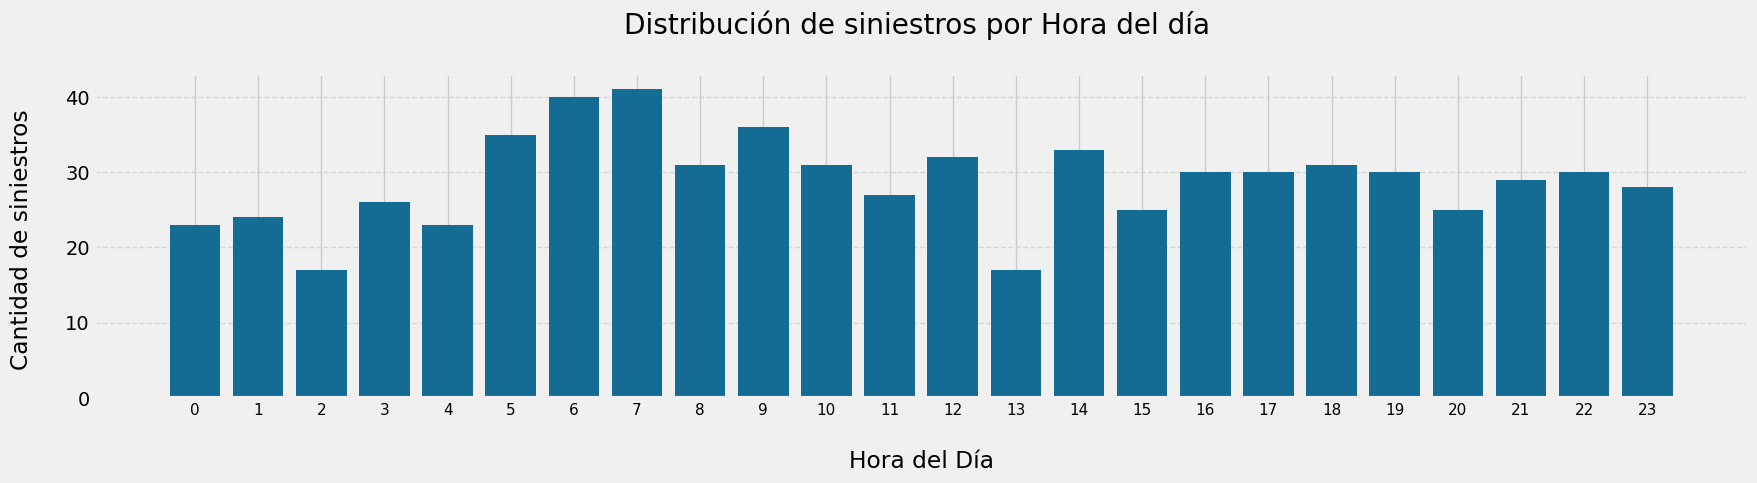

In [76]:
# Obtenemos la cantidad de siniestros por hora
siniestros_por_hora = homicidios_hechos_['Hora entera'].value_counts().sort_index()

plt.figure(figsize=(19, 4))

plt.bar(siniestros_por_hora.index, siniestros_por_hora.values, color='#146C94')
plt.xlabel('\nHora del Día') 
plt.ylabel('Cantidad de siniestros \n')
plt.title('Distribución de siniestros por Hora del día \n')
plt.xticks(range(0, 24), fontsize= 11)  # Establecemos las etiquetas del eje x para las horas del día
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

podemos ver un incremento bastante notorio durante las 05:00 y las 07:00 esto puede deberse a que es el horario en el que las personas se movilizan mas para ir a sus trabajos, probocando mayor transito y aumentanzo la taza de accidentes

#####  Distribución de siniestros por Acusado

Observaremos la distribución por tipo de acusado, esto nos permitira visualizar cuales son aquellos que causan mas víctimas por siniestros.

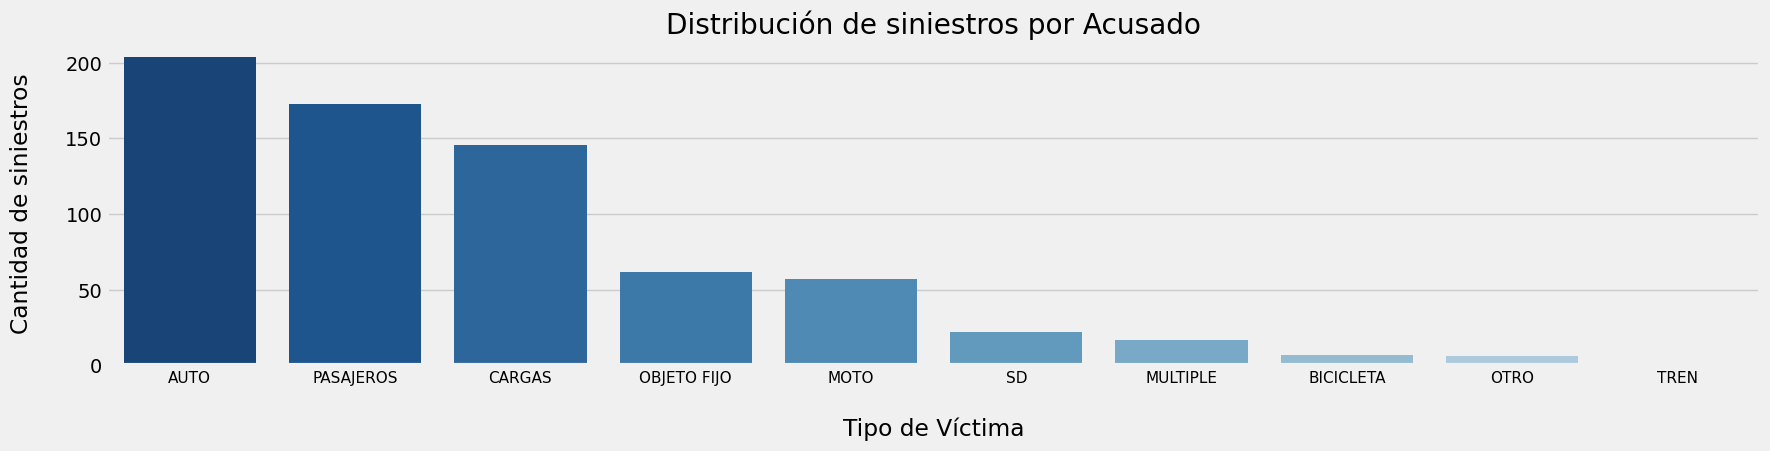

In [78]:
# Obtenemos la cantidad de siniestros por acusado
count_por_acusado = homicidios_hechos_['Acusado'].value_counts()

palette = sns.color_palette("Blues", (len(count_por_acusado) + 3))
palette = palette[::-1] 

plt.figure(figsize=(19, 4))
sns.barplot(x=count_por_acusado.index, y=count_por_acusado.values, palette= palette)
plt.ylabel('Cantidad de siniestros\n')
plt.xlabel('\nTipo de Víctima')
plt.title('Distribución de siniestros por Acusado')
plt.xticks(fontsize= 11)

plt.show()

podemos ver que hay una gran cantidad de siniestros provocados por AUTOS, PASAJEROS y CARGAS, estos dos últimos hace referencia a:
- **PASAJERO**: *Unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia.*

- **CARGA**: *Vehículo a motor destiando al transporte de cargas, incluye camiones pesados (con o sin acoplado o semirremolque, etc., camión de recolección de residuos) y livianos (utilitarios, furgonetas, pick-ups, camioneta con caja de carga).*

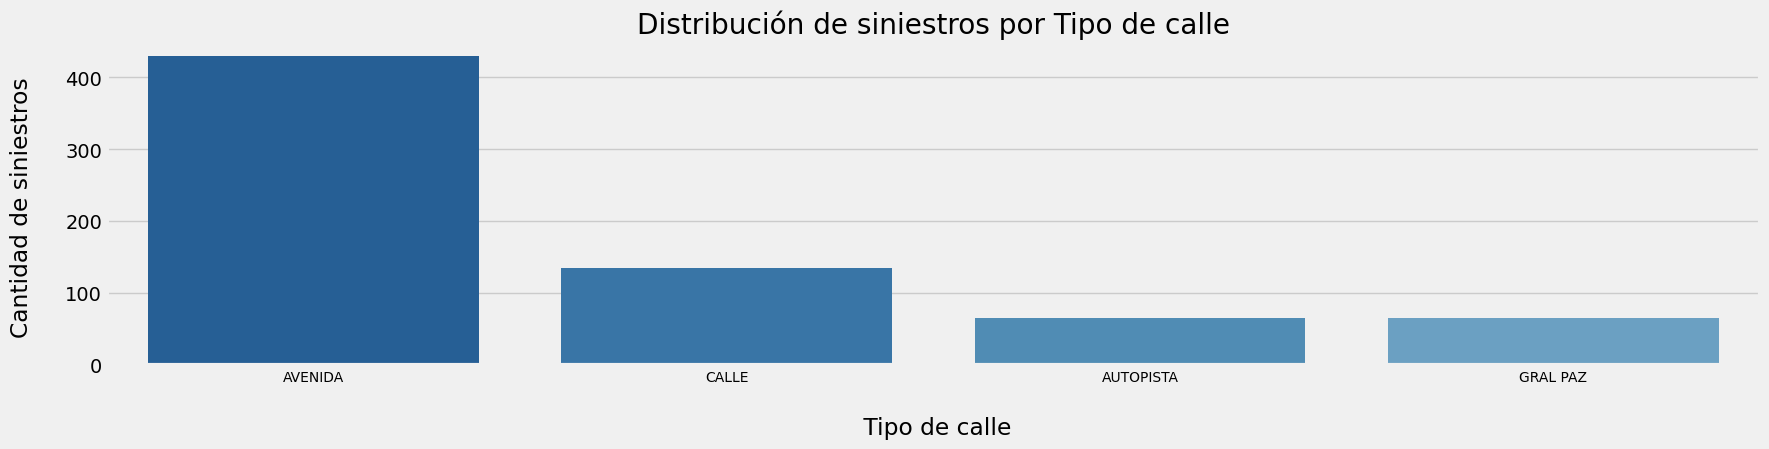

In [79]:
# Obtenemos la cantidad de siniestros por tipo de calle
count_por_calle = homicidios_hechos_['Tipo de calle'].value_counts()

palette = sns.color_palette("Blues", len(count_por_acusado))
palette = palette[8::-1] 

plt.figure(figsize=(19, 4))
sns.barplot(x=count_por_calle.index, y=count_por_calle.values, palette= palette)
plt.xlabel('\n Tipo de calle')
plt.ylabel('Cantidad de siniestros \n')
plt.title('Distribución de siniestros por Tipo de calle')
plt.xticks(fontsize= 10)

plt.show()

podemos notar que en las avenidas en porcentaje de siniestro es mucho mayor, es algo ya que es donde encontramos mayor cantidad de transito por ser arterias importantes que conectan puntos claves de una ciudad por ejemplo

#####  Distribución de siniestros por Comuna

Observemos la cantidad de siniestros que hubo por Comuna.

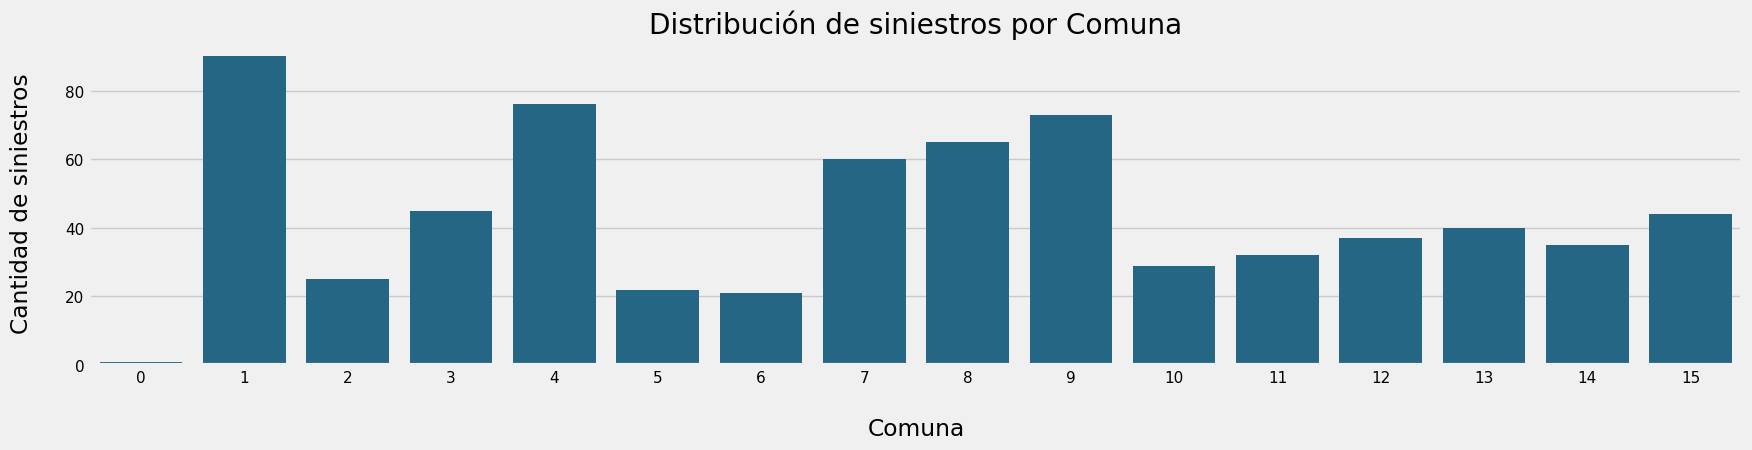

In [80]:
plt.figure(figsize=(19, 4))

sns.countplot(data= homicidios_hechos_, x= 'Comuna', color='#146C94')
plt.xlabel('\nComuna')
plt.ylabel('Cantidad de siniestros\n')
plt.title('Distribución de siniestros por Comuna')
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)

plt.show()

In [81]:
homicidios_hechos_[homicidios_hechos_.Comuna == 0]

,Id Hecho,Nro de víctimas,Fecha,Año,Mes,Día,Hora,Hora entera,Lugar del hecho,Tipo de calle,...,Dirección normalizada,Comuna,XY (CABA),POS X,POS Y,Participantes,Víctima,Acusado,Día de la Semana,Tipo de Día
139,2016-0174,1,2016-12-27,2016,Diciembre,27,00:00:00,0.0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,AUTOPISTA 25 DE MAYO,0,Point (. .),NaN,NaN,SD-SD,SD,SD,Martes,Día de Semana


Notamos que hay un registro con el valor 0 como Comuna, el cual es un error ya que no existe la comuna *'0'*, ademas observamos que no hay muchos datos de ese registros. Asi que procedemos a eliminar dicho registro.

In [82]:
homicidios_hechos_.drop(homicidios_hechos_[homicidios_hechos_['Comuna'] == 0].index, inplace=True)

volvemos a graficar para corroborar

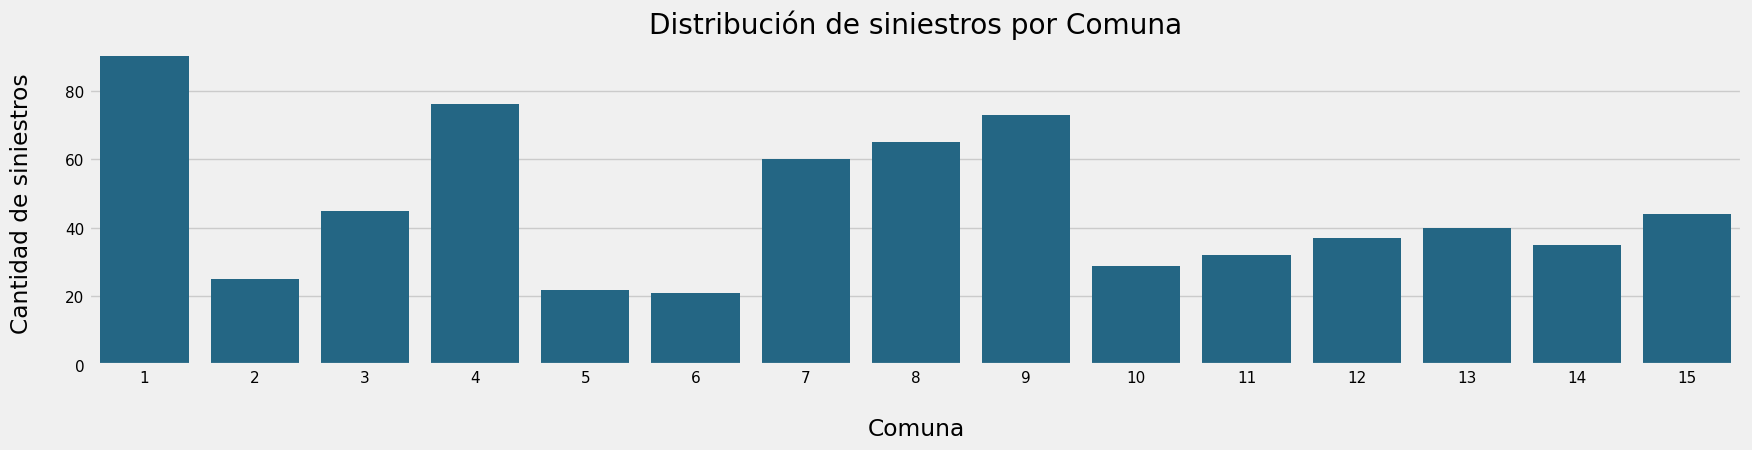

In [83]:
plt.figure(figsize=(19, 4))

sns.countplot(data= homicidios_hechos_, x= 'Comuna', color='#146C94')
plt.xlabel('\nComuna')
plt.ylabel('Cantidad de siniestros\n')
plt.title('Distribución de siniestros por Comuna')
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)

plt.show()

Notamos que hay más cantidad de siniestros en la Comuna 1 de la *Ciudad Autónoma de Buenos Aires*. Veamos que barrios conforman esta Comuna...

In [84]:
u.barrios_por_comuna(1)

'Los barrios que conforman la Comuna 1 son: Retiro, San Nicolás, Puerto Madero, San Telmo y Constitución'

#### Guardado del DataFrame

In [86]:
homicidios_hechos_.to_csv('C:/Users/Raul Penayo/Desktop/p2ori/homicidios_hechos.csv', encoding='utf-8', index= False)

### DataFrame *VICTIMAS*

#### Información General

In [87]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id Hecho               695 non-null    object        
 1   Nro de víctimas        695 non-null    int64         
 2   Fecha                  695 non-null    datetime64[ns]
 3   Año                    695 non-null    int64         
 4   Mes                    695 non-null    object        
 5   Día                    695 non-null    int64         
 6   Hora                   695 non-null    object        
 7   Hora entera            695 non-null    object        
 8   Lugar del hecho        695 non-null    object        
 9   Tipo de calle          695 non-null    object        
 10  Calle                  695 non-null    object        
 11  Cruce                  695 non-null    object        
 12  Dirección normalizada  695 non-null    object        
 13  Comuna    

In [88]:
homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Vemos que hay 10 columnas y 717 registros en este DataFrame. Ademas notamos que no hay registros con valores nulos en ninguna columna, asi que procedemos a normalizar las columnas.

#### Normalización de columnas

- Cambiamos todas las columnas para que solo la primera letra esté en mayúscula.

In [89]:
homicidios_victimas.columns = [x.capitalize() for x in homicidios_victimas.columns]

In [90]:
homicidios_victimas.columns

Index(['Id_hecho', 'Fecha', 'Aaaa', 'Mm', 'Dd', 'Rol', 'Victima', 'Sexo',
       'Edad', 'Fecha_fallecimiento'],
      dtype='object')

- Modificamos el nombre de algunas columnas para mayor entendimiento. <p>
    1. Primero veamos el *DICCIONARIO DE VICTIMAS*.

In [93]:
# Leer una hoja específica por nombre
data = pd.read_excel('C:/Users/Raul Penayo/Desktop/p2ori/Diccionario de datos Siniestros viales.xlsx',sheet_name='DICCIONARIO_VICTIMAS')
print(data.head())

  variables y definiciones                        descripción Unnamed: 2
0                 ID_hecho  identificador unico del siniestro        NaN
1                    FECHA        fecha en formato dd/mm/aaaa        NaN
2                     AAAA                                año        NaN
3                       MM                                mes        NaN
4                       DD                        día del mes        NaN


2. Ahora modificamos las siguientes columnas:<p>
    * ID_hecho: Id Hecho.
    * Aaaa: Año.
    * Mm: Mes.
    * Dd: Día.
    * Victima: Víctima.
    * Fecha_fallecimiento: Fecha de fallecimiento.

In [94]:
new_name = {'Id_hecho':'Id Hecho',
            'Aaaa':'Año',
            'Mm':'Mes',
            'Dd':'Día',
            'Victima': 'Víctima',
            'Fecha_fallecimiento': 'Fecha de fallecimiento'}

homicidios_victimas.rename(columns=new_name, inplace=True)

In [95]:
homicidios_victimas.head(2)

,Id Hecho,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha de fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


Registros Duplicados

In [96]:
u.filas_duplicadas(homicidios_victimas)

'El DataFrame no tiene filas duplicadas'

tipos de datos

In [97]:
u.tipos_de_datos_unico(homicidios_victimas)

+------------------------+----------------------------------------------------+
|         Campo          |                   Tipo de datos                    |
+------------------------+----------------------------------------------------+
|        Id Hecho        |                   <class 'str'>                    |
|         Fecha          | <class 'pandas._libs.tslibs.timestamps.Timestamp'> |
|          Año           |                   <class 'int'>                    |
|          Mes           |                   <class 'int'>                    |
|          Día           |                   <class 'int'>                    |
|          Rol           |                   <class 'str'>                    |
|        Víctima         |                   <class 'str'>                    |
|          Sexo          |                   <class 'str'>                    |
|          Edad          |            <class 'int'>, <class 'str'>            |
| Fecha de fallecimiento |     <class 'd

Vemos que la columna ***Edad*** y ***Fecha de fallecimiento*** tienen mas de un tipo de dato en sus registros. Analicemos estas columnas...

* Columna ***Edad***
    1. Veamos la cantidad de registros por tipo de dato.

In [98]:
u.count_data_by_type(homicidios_victimas,'Edad',str)

"En la columna Edad del DataFrame hay 53 de registros del tipo <class 'str'>"

In [99]:
u.count_data_by_type(homicidios_victimas,'Edad',int)

"En la columna Edad del DataFrame hay 664 de registros del tipo <class 'int'>"

Observamos que hay mas registros del tipo *'int'*, veamos los registros del tipo *'str'*

In [100]:
homicidios_victimas.loc[homicidios_victimas['Edad'].apply(lambda x: isinstance(x,str))].head()

,Id Hecho,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha de fallecimiento
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD


In [101]:
homicidios_victimas.loc[homicidios_victimas['Edad'].apply(lambda x: isinstance(x,str))]['Edad'].unique()

array(['SD'], dtype=object)

Notamos que los registros del tipo *'str'* en la columna **Edad** se debe a que no hay datos del mismo y que se imputó como ***'SD'*** que significa: Sin Dato. Asi que no modificamos estos registros.

##### Registros ***SD*** (Sin Dato)

En el análisis del DataFrame, notamos que hay registros con valores *'SD'*, veamos el porcentaje que representan esos registros en el DataFrame.

In [102]:
u.calculate_percentage_of_sd(homicidios_victimas)

+------------------------+--------------------+
|        Columna         | Porcentaje de 'SD' |
+------------------------+--------------------+
|        Id Hecho        |       0.00%        |
|         Fecha          |       0.00%        |
|          Año           |       0.00%        |
|          Mes           |       0.00%        |
|          Día           |       0.00%        |
|          Rol           |       1.53%        |
|        Víctima         |       1.26%        |
|          Sexo          |       0.84%        |
|          Edad          |       7.39%        |
| Fecha de fallecimiento |       9.48%        |
+------------------------+--------------------+


Vemos que esos registros no es significativo en el DataFrame, en la columna *'Fecha de fallecimiento'* representan casi un 10%, pero no hay manera de imputar esos datos con este DataFrame, y como son datos sensibles, decidí no hacer cambios al respecto.

#### Guardado del DataFrame

Una vez que limpiamos y modificamos, guardamos el DataFrame en un archivo CSV.

In [104]:
homicidios_victimas.to_csv('C:/Users/Raul Penayo/Desktop/p2ori//homicidios_víctimas.csv', encoding='utf-8', index=False)

#### Visualización de datos

Vamos a utilizar gráficos para poder comprender mejor los datos.
<p> Pero antes, haremos una copia del DataFrame por si necesitamos realizar algunos cambios para la visualización.

In [105]:
homicidios_victimas_ =  homicidios_victimas.copy()

In [106]:
homicidios_victimas_.head()

,Id Hecho,Fecha,Año,Mes,Día,Rol,Víctima,Sexo,Edad,Fecha de fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


##### Distribución de las edades de las víctimas

Primero,como sabemos que tenemos valores SD en la columna *'Edad'*, lo excluimos del gráfico.

In [107]:
homicidios_victimas_ = homicidios_victimas_[homicidios_victimas_['Edad'] != 'SD']

Graficamos para observar mejor

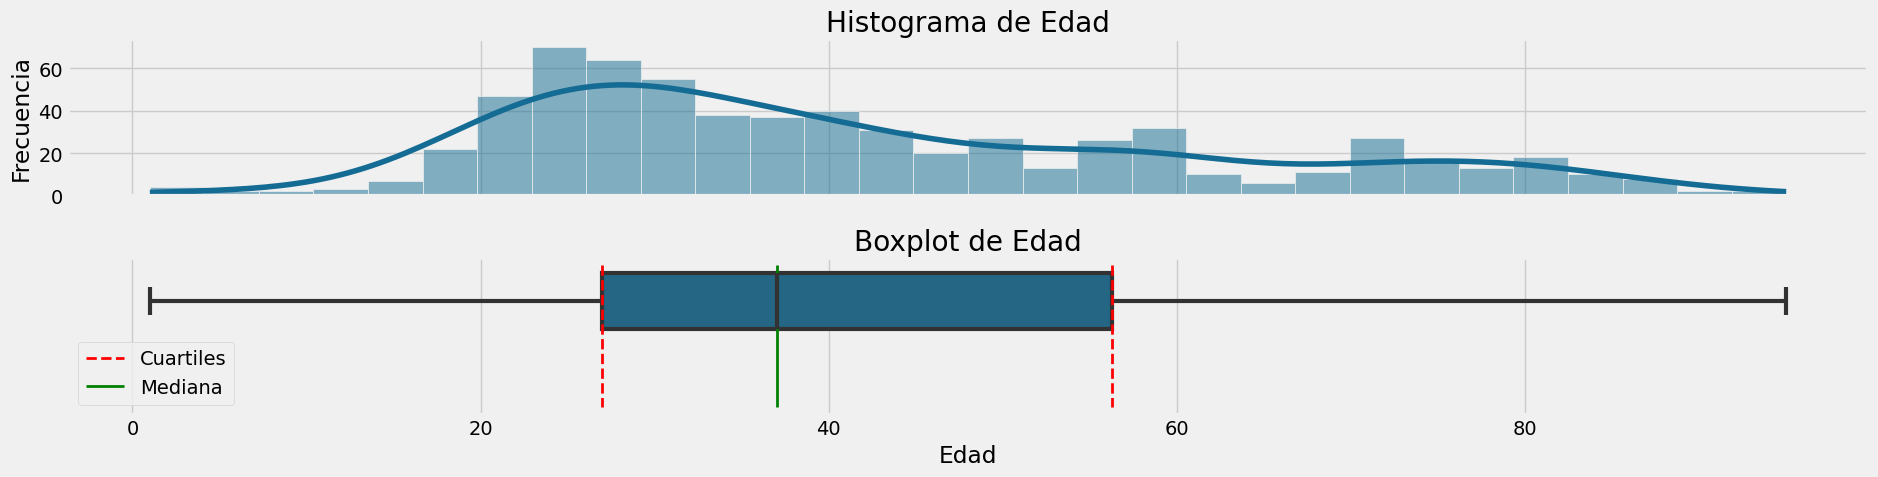

In [109]:
fig, ax = plt.subplots(2, 1, figsize=(19, 5), sharex=True)
    
sns.histplot(homicidios_victimas_['Edad'], kde= True, ax=ax[0], bins=30 , color='#146C94')
ax[0].set_title('Histograma de Edad')
ax[0].set_ylabel('Frecuencia')
    
sns.boxplot(x=homicidios_victimas_['Edad'], ax=ax[1], color='#146C94', linewidth= 3)
ax[1].set_title('Boxplot de Edad') 
ax[1].set_xlabel('Edad')

# Agregar líneas verticales para representar cuartiles y mediana
quartiles = homicidios_victimas_['Edad'].quantile([0.25, 0.75]).values
median = homicidios_victimas_['Edad'].median()

ax[1].vlines(quartiles, ymin=-0.5, ymax=1.5, color='red', linestyle='--', linewidth=2, label='Cuartiles')
ax[1].vlines(median, ymin=-0.5, ymax=1.5, color='green', linestyle='-', linewidth=2, label='Mediana')

ax[1].legend()  
    
plt.tight_layout()
plt.show()

Observamos que las edades entre 20 y 40 años tienen una mayor frecuencia de siniestros viales. Además, el *Boxplot* nos muestra que el 75% de las victimas de siniestros son menores a 56 años.

##### Distribución de cantidad de víctimas por año y sexo.

Primero tenemos que crear un DataFrame donde nos diga la cantidad de víctimas por año y según el sexo.

In [110]:
homicidios_victimas_pivot = homicidios_victimas_.pivot_table(index='Año', columns='Sexo', aggfunc='size', fill_value=0)

In [111]:
homicidios_victimas_pivot

Sexo,FEMENINO,MASCULINO
Año,,
2016,23,107
2017,35,98
2018,37,104
2019,24,68
2020,15,60
2021,21,72


Graficamos

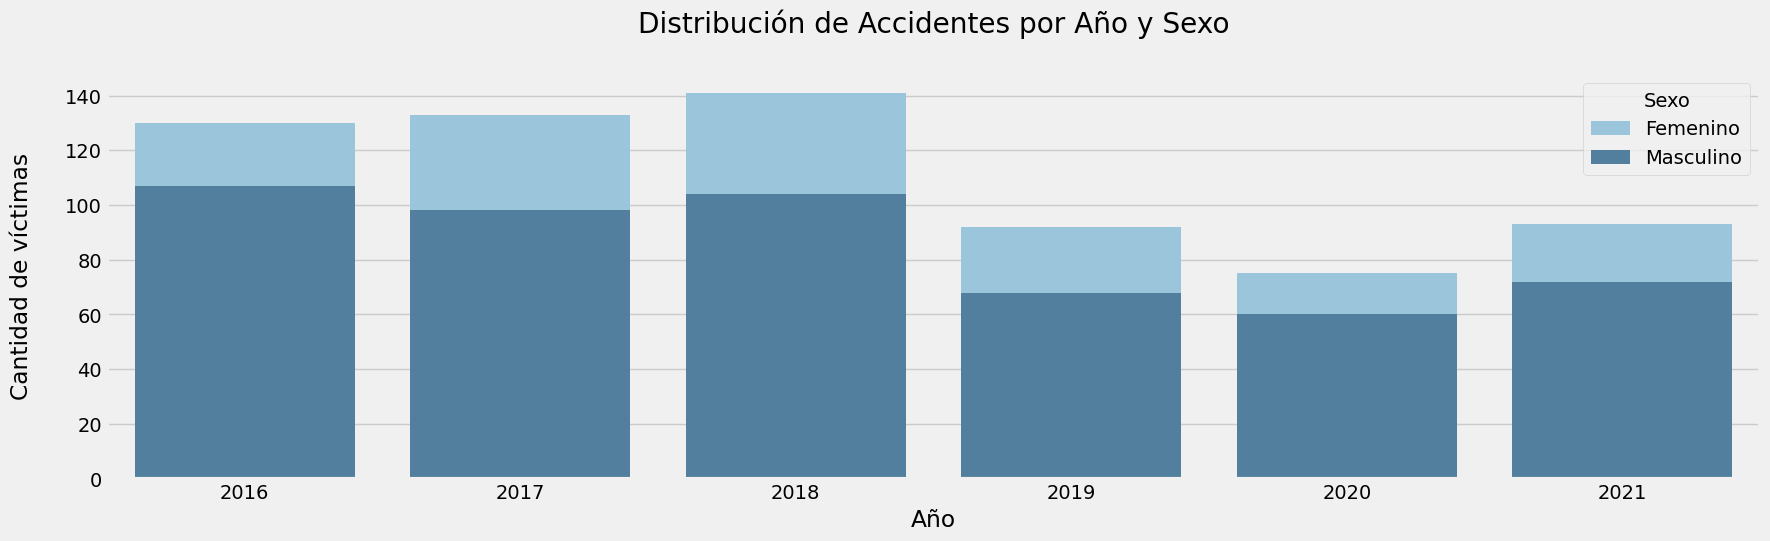

In [112]:
plt.figure(figsize=(19, 5))

sns.barplot(data=homicidios_victimas_pivot, x=homicidios_victimas_pivot.index, y=homicidios_victimas_pivot.sum(axis=1), color='#91C8E4', label='Femenino')
sns.barplot(data=homicidios_victimas_pivot, x=homicidios_victimas_pivot.index, y='MASCULINO', color='#4682A9', label='Masculino')

plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas\n')
plt.title('Distribución de Accidentes por Año y Sexo\n')
plt.legend(title='Sexo', loc='upper right')
plt.xticks()

plt.show()

Se observa una mayor cantidad de victima de sexo ***Masculino*** en los siniestros de todos los años a comparacion de las victimas de sexo ***Femenino***. 

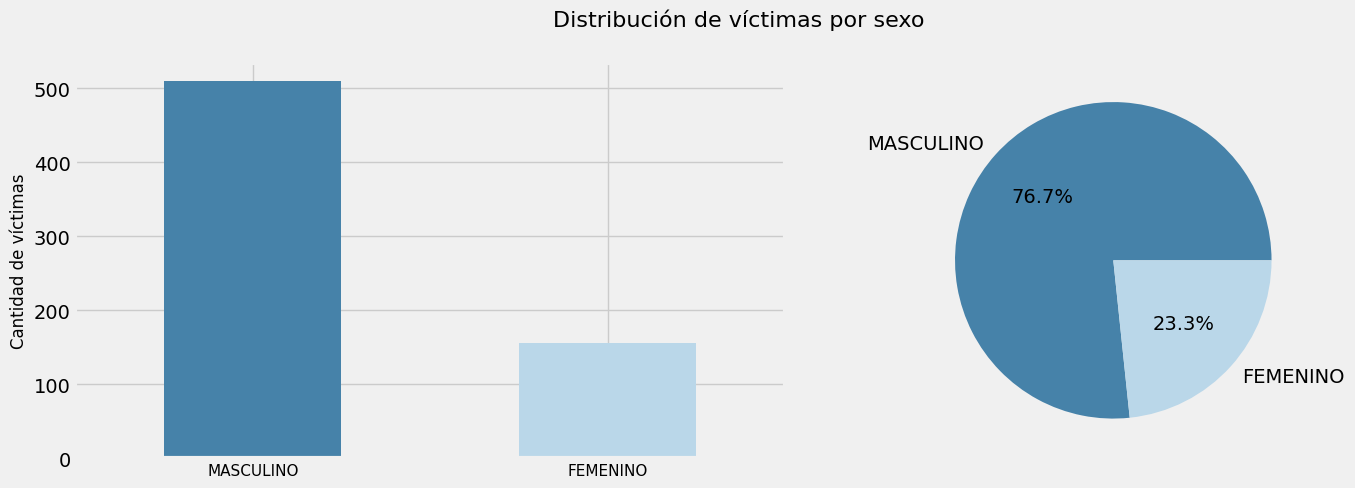

In [114]:
victimas_sexo = homicidios_victimas_['Sexo'].value_counts()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  
victimas_sexo.plot(kind='bar', color=['#4682A9', '#BAD7E9'])
plt.xlabel('')
plt.ylabel('Cantidad de víctimas',fontsize= 12)
plt.xticks(rotation= 0,fontsize= 11) 

plt.subplot(1, 2, 2)  
victimas_sexo.plot(kind='pie', autopct='%1.1f%%', colors=['#4682A9', '#BAD7E9'])
plt.ylabel('')

plt.suptitle('Distribución de víctimas por sexo', fontsize=16)

plt.tight_layout() 
plt.show()

Efectivamente, como en el gráfico anterior mencionabamos, las víctimas de sexo ***Masculino*** representa un 76,7% en los siniestros, mientras que las víctimas de sexo ***Femenino*** representan solo un 23.3%.

Distribucion por tipo de victima

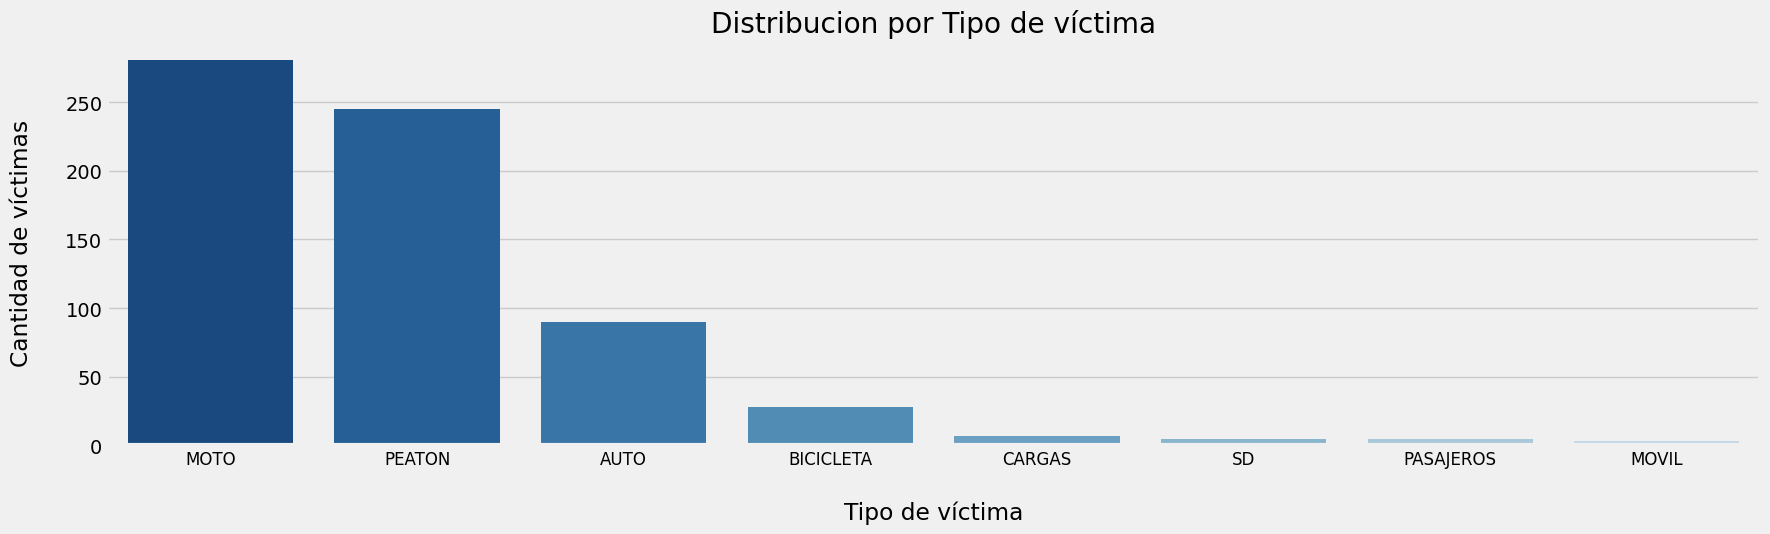

In [116]:
tipo_victima = homicidios_victimas_['Víctima'].value_counts()

palette = sns.color_palette("Blues", (len(tipo_victima) + 2))
palette = palette[::-1] 

plt.figure(figsize=(19, 5))
sns.barplot(x=tipo_victima.index, y=tipo_victima.values, palette=palette)

plt.xlabel('\nTipo de víctima')
plt.ylabel('Cantidad de víctimas\n')
plt.title('Distribucion por Tipo de víctima')
plt.xticks(fontsize= 12)

plt.show()

Notamos que las principales víctimas de siniestros viales son las **MOTOS**, los **PEATONES** y los **AUTOS**.

Distribucion por rol

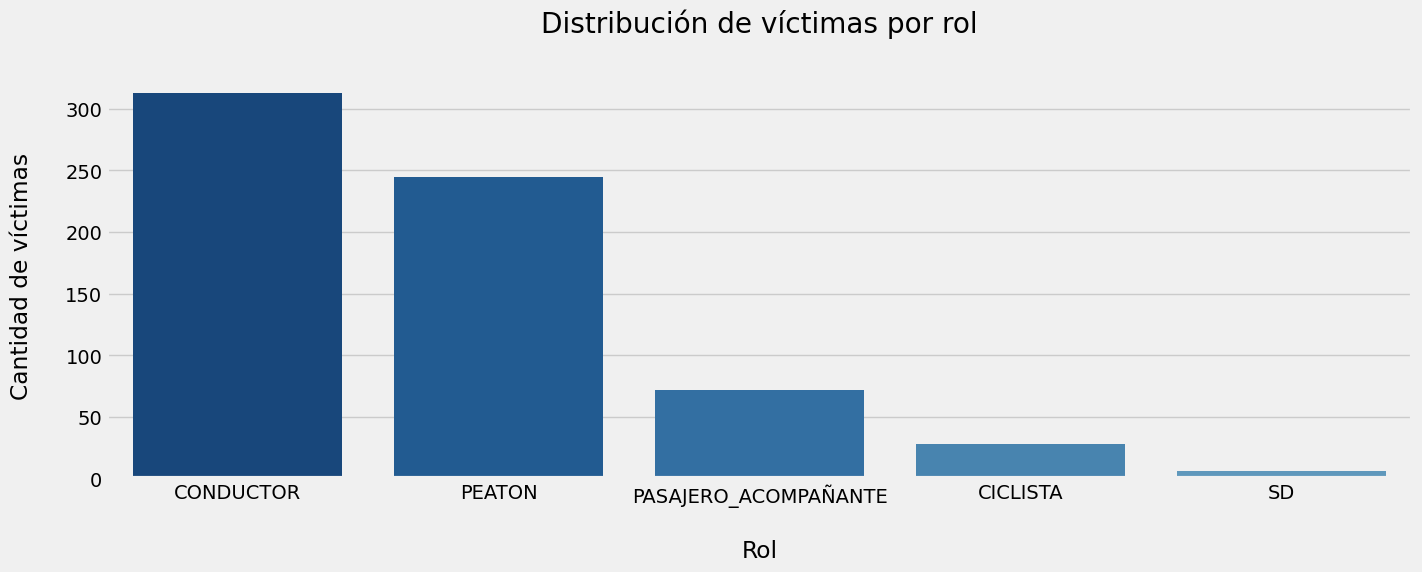

In [117]:
rol_victima = homicidios_victimas_['Rol'].value_counts()

palette = sns.color_palette("Blues", (len(count_por_acusado) + 1))
palette = palette[::-1] 

plt.figure(figsize=(15, 5))
sns.barplot(x=rol_victima.index, y=rol_victima.values, palette=palette)

plt.xlabel('\nRol')
plt.ylabel('Cantidad de víctimas\n')
plt.title('Distribución de víctimas por rol\n')

plt.show()

podemos observar para concluir, que la mayoria de las víctimas de los siniestros son **CONDUCTORES**, **PEATONES** y **PASAJEROS ACOMPAÑANTES**. 